# **Прогнозирование конечных свойств новых материалов**


---



# Import

In [50]:
import pandas as pd
import numpy as np
import seaborn as sb
from tensorflow.keras import utils
from PIL import Image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from google.colab import drive
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline


# Загрузка датасета

In [4]:
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [5]:
df_x_bp = pd.read_excel('drive/MyDrive/ds/data/X_bp.xlsx')
df_x_nup = pd.read_excel('drive/MyDrive/ds/data/X_nup.xlsx')

# **EDA**

In [6]:
#df_x_bp.head(10)
df_x_bp

,Unnamed: 0,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
0,0.0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000
1,1.0,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000
2,2.0,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000
3,3.0,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000
4,4.0,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000
...,...,...,...,...,...,...,...,...,...,...,...
1018,1018.0,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669
1019,1019.0,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099
1020,1020.0,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764
1021,1021.0,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067


In [7]:
df_x_bp.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

In [8]:
df_x_bp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    1023 non-null   float64
 1   Соотношение матрица-наполнитель       1023 non-null   float64
 2   Плотность, кг/м3                      1023 non-null   float64
 3   модуль упругости, ГПа                 1023 non-null   float64
 4   Количество отвердителя, м.%           1023 non-null   float64
 5   Содержание эпоксидных групп,%_2       1023 non-null   float64
 6   Температура вспышки, С_2              1023 non-null   float64
 7   Поверхностная плотность, г/м2         1023 non-null   float64
 8   Модуль упругости при растяжении, ГПа  1023 non-null   float64
 9   Прочность при растяжении, МПа         1023 non-null   float64
 10  Потребление смолы, г/м2               1023 non-null   float64
dtypes: float64(11)
me

In [9]:
df_x_bp.describe()

,id,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
count,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000,1023.000000
mean,511.000000,2.930366,1975.734888,739.923233,110.570769,22.244390,285.882151,482.731833,73.328571,2466.922843,218.423144
std,295.458965,0.913222,73.729231,330.231581,28.295911,2.406301,40.943260,281.314690,3.118983,485.628006,59.735931
min,0.000000,0.389403,1731.764635,2.436909,17.740275,14.254985,100.000000,0.603740,64.054061,1036.856605,33.803026
25%,255.500000,2.317887,1924.155467,500.047452,92.443497,20.608034,259.066528,266.816645,71.245018,2135.850448,179.627520
50%,511.000000,2.906878,1977.621657,739.664328,110.564840,22.230744,285.896812,451.864365,73.268805,2459.524526,219.198882
75%,766.500000,3.552660,2021.374375,961.812526,129.730366,23.961934,313.002106,693.225017,75.356612,2767.193119,257.481724
max,1022.000000,5.591742,2207.773481,1911.536477,198.953207,33.000000,413.273418,1399.542362,82.682051,3848.436732,414.590628


In [10]:
df_x_bp.nunique()

id                                      1023
Соотношение матрица-наполнитель         1014
Плотность, кг/м3                        1013
модуль упругости, ГПа                   1020
Количество отвердителя, м.%             1005
Содержание эпоксидных групп,%_2         1004
Температура вспышки, С_2                1003
Поверхностная плотность, г/м2           1004
Модуль упругости при растяжении, ГПа    1004
Прочность при растяжении, МПа           1004
Потребление смолы, г/м2                 1003
dtype: int64

In [11]:
df_x_bp.shape

(1023, 11)

In [12]:
df_x_bp.corr()

,id,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2"
id,1.000000,-0.018560,-0.054704,-0.048318,0.020763,0.004583,0.011248,0.026010,0.030769,0.036775,0.006488
Соотношение матрица-наполнитель,-0.018560,1.000000,0.003841,0.031700,-0.006445,0.019766,-0.004776,-0.006272,-0.008411,0.024148,0.072531
"Плотность, кг/м3",-0.054704,0.003841,1.000000,-0.009647,-0.035911,-0.008278,-0.020695,0.044930,-0.017602,-0.069981,-0.015937
"модуль упругости, ГПа",-0.048318,0.031700,-0.009647,1.000000,0.024049,-0.006804,0.031174,-0.005306,0.023267,0.041868,0.001840
"Количество отвердителя, м.%",0.020763,-0.006445,-0.035911,0.024049,1.000000,-0.000684,0.095193,0.055198,-0.065929,-0.075375,0.007446
"Содержание эпоксидных групп,%_2",0.004583,0.019766,-0.008278,-0.006804,-0.000684,1.000000,-0.009769,-0.012940,0.056828,-0.023899,0.015165
"Температура вспышки, С_2",0.011248,-0.004776,-0.020695,0.031174,0.095193,-0.009769,1.000000,0.020121,0.028414,-0.031763,0.059954
"Поверхностная плотность, г/м2",0.026010,-0.006272,0.044930,-0.005306,0.055198,-0.012940,0.020121,1.000000,0.036702,-0.003210,0.015692
"Модуль упругости при растяжении, ГПа",0.030769,-0.008411,-0.017602,0.023267,-0.065929,0.056828,0.028414,0.036702,1.000000,-0.009009,0.050938
"Прочность при растяжении, МПа",0.036775,0.024148,-0.069981,0.041868,-0.075375,-0.023899,-0.031763,-0.003210,-0.009009,1.000000,0.028602


In [13]:
df_x_nup

,Unnamed: 0,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.0,0.0,4.000000,57.000000
1,1.0,0.0,4.000000,60.000000
2,2.0,0.0,4.000000,70.000000
3,3.0,0.0,5.000000,47.000000
4,4.0,0.0,5.000000,57.000000
...,...,...,...,...
1035,1035.0,90.0,8.088111,47.759177
1036,1036.0,90.0,7.619138,66.931932
1037,1037.0,90.0,9.800926,72.858286
1038,1038.0,90.0,10.079859,65.519479


In [14]:
df_x_nup.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

In [15]:
df_x_nup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  1040 non-null   float64
 1   Угол нашивки, град  1040 non-null   float64
 2   Шаг нашивки         1040 non-null   float64
 3   Плотность нашивки   1040 non-null   float64
dtypes: float64(4)
memory usage: 32.6 KB


In [16]:
df_x_nup.describe()

,id,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
count,1040.000000,1040.00000,1040.000000,1040.000000
mean,519.500000,45.00000,6.911385,57.248399
std,300.366443,45.02165,2.555181,12.332438
min,0.000000,0.00000,0.000000,0.000000
25%,259.750000,0.00000,5.102256,49.970740
50%,519.500000,45.00000,6.938000,57.413594
75%,779.250000,90.00000,8.587662,65.107235
max,1039.000000,90.00000,14.440522,103.988901


In [17]:
df_x_nup.nunique()

id                    1040
Угол нашивки, град       2
Шаг нашивки           1006
Плотность нашивки     1005
dtype: int64

In [18]:
df_x_nup.shape

(1040, 4)

In [19]:
df_x_nup.corr()

,id,"Угол нашивки, град",Шаг нашивки,Плотность нашивки
id,1.000000,0.801971,0.031989,0.090130
"Угол нашивки, град",0.801971,1.000000,0.028064,0.113991
Шаг нашивки,0.031989,0.028064,1.000000,0.009268
Плотность нашивки,0.090130,0.113991,0.009268,1.000000


In [20]:
df = pd.merge(df_x_bp, df_x_nup, left_on='id', right_on='id', how='outer')
df.shape

(1040, 14)

In [21]:
#df.isnull().sum()
df.isna().sum()
df.dropna(inplace=True)


In [22]:
df.isna().sum()

id                                      0
Соотношение матрица-наполнитель         0
Плотность, кг/м3                        0
модуль упругости, ГПа                   0
Количество отвердителя, м.%             0
Содержание эпоксидных групп,%_2         0
Температура вспышки, С_2                0
Поверхностная плотность, г/м2           0
Модуль упругости при растяжении, ГПа    0
Прочность при растяжении, МПа           0
Потребление смолы, г/м2                 0
Угол нашивки, град                      0
Шаг нашивки                             0
Плотность нашивки                       0
dtype: int64

In [23]:
df.drop(columns =['id'], inplace = True)
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,30.00,22.267857,100.000000,210.0,70.0,3000.0,220.0,0.0,4.0,57.0
1,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,60.0
2,1.857143,2030.0,738.736842,49.90,33.000000,284.615385,210.0,70.0,3000.0,220.0,0.0,4.0,70.0
3,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0.0,5.0,47.0
4,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0.0,5.0,57.0


In [24]:
#df.rename(columns = {'Соотношение матрица-наполнитель': 'Rat', 'Плотность, кг/м3': 'density',
#                    'модуль упругости, ГПа': 'elastic', 'Количество отвердителя, м.%': 'hardener',
#                    'Содержание эпоксидных групп,%_2': 'epoxy_g', 'Температура вспышки, С_2': 'Flash point',
#                    'Поверхностная плотность, г/м2': 'A', 'Модуль упругости при растяжении, ГПа': 'B',
#                    'Прочность при растяжении, МПа': 'C', 'Потребление смолы, г/м2': 'resin',
#                    'Угол нашивки, град': 'angle', 'Шаг нашивки': 'Step', 'Плотность нашивки': 'P_Density'}, inplace = True) 

In [25]:
df.describe().round(1).T
df

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,1.857143,2030.000000,738.736842,30.000000,22.267857,100.000000,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,57.000000
1,1.857143,2030.000000,738.736842,50.000000,23.750000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,60.000000
2,1.857143,2030.000000,738.736842,49.900000,33.000000,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,4.000000,70.000000
3,1.857143,2030.000000,738.736842,129.000000,21.250000,300.000000,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,47.000000
4,2.771331,2030.000000,753.000000,111.860000,22.267857,284.615385,210.000000,70.000000,3000.000000,220.000000,0.0,5.000000,57.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,2.271346,1952.087902,912.855545,86.992183,20.123249,324.774576,209.198700,73.090961,2387.292495,125.007669,90.0,9.076380,47.019770
1019,3.444022,2050.089171,444.732634,145.981978,19.599769,254.215401,350.660830,72.920827,2360.392784,117.730099,90.0,10.565614,53.750790
1020,3.280604,1972.372865,416.836524,110.533477,23.957502,248.423047,740.142791,74.734344,2662.906040,236.606764,90.0,4.161154,67.629684
1021,3.705351,2066.799773,741.475517,141.397963,19.246945,275.779840,641.468152,74.042708,2071.715856,197.126067,90.0,6.313201,58.261074


**Гистограммы распределения**

In [30]:
for i in df.columns:
  print(' - ' + i + ';')

 - Соотношение матрица-наполнитель;
 - Плотность, кг/м3;
 - модуль упругости, ГПа;
 - Количество отвердителя, м.%;
 - Содержание эпоксидных групп,%_2;
 - Температура вспышки, С_2;
 - Поверхностная плотность, г/м2;
 - Модуль упругости при растяжении, ГПа;
 - Прочность при растяжении, МПа;
 - Потребление смолы, г/м2;
 - Угол нашивки, град;
 - Шаг нашивки;
 - Плотность нашивки;


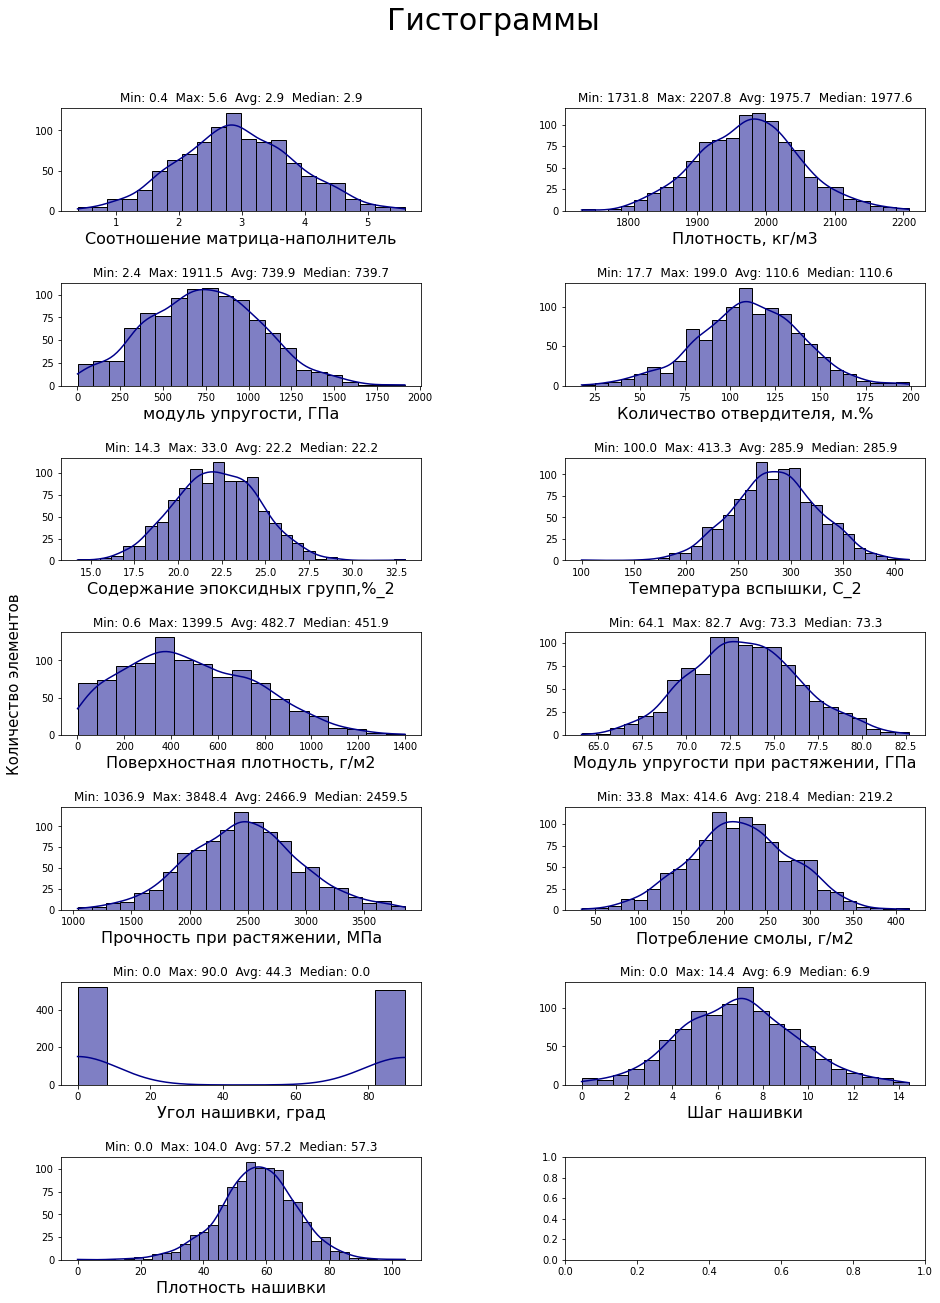

<Figure size 432x288 with 0 Axes>

In [35]:
cols = 2
fig, axes = plt.subplots(len(df.columns) // cols + 1, cols, figsize=(15, 20))
fig.suptitle(t="Гистограммы",  y=0.97, fontsize=30)
fig.text(0.05, 0.5, 'Количество элементов', va='center', rotation='vertical', size = 15)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.7)

ax = 0
for i in df.columns:
  axs = axes[ax // cols, ax % cols]
  axs.set_title(f'Min: {round(df[i].min(), 1)}  Max: {round(df[i].max(), 1)}  Avg: {round(df[i].mean(), 1)}  Median: {round(df[i].median(), 1)}' )
  sns.histplot(ax=axs, data = df[i], kde = True, color= 'DarkBlue')
  axs.set_xlabel(axs.get_xlabel(), fontdict={'size': 16})
  axs.set_ylabel('')
  ax = ax + 1
plt.show()
plt.savefig('gist.png')

**Boxplot**

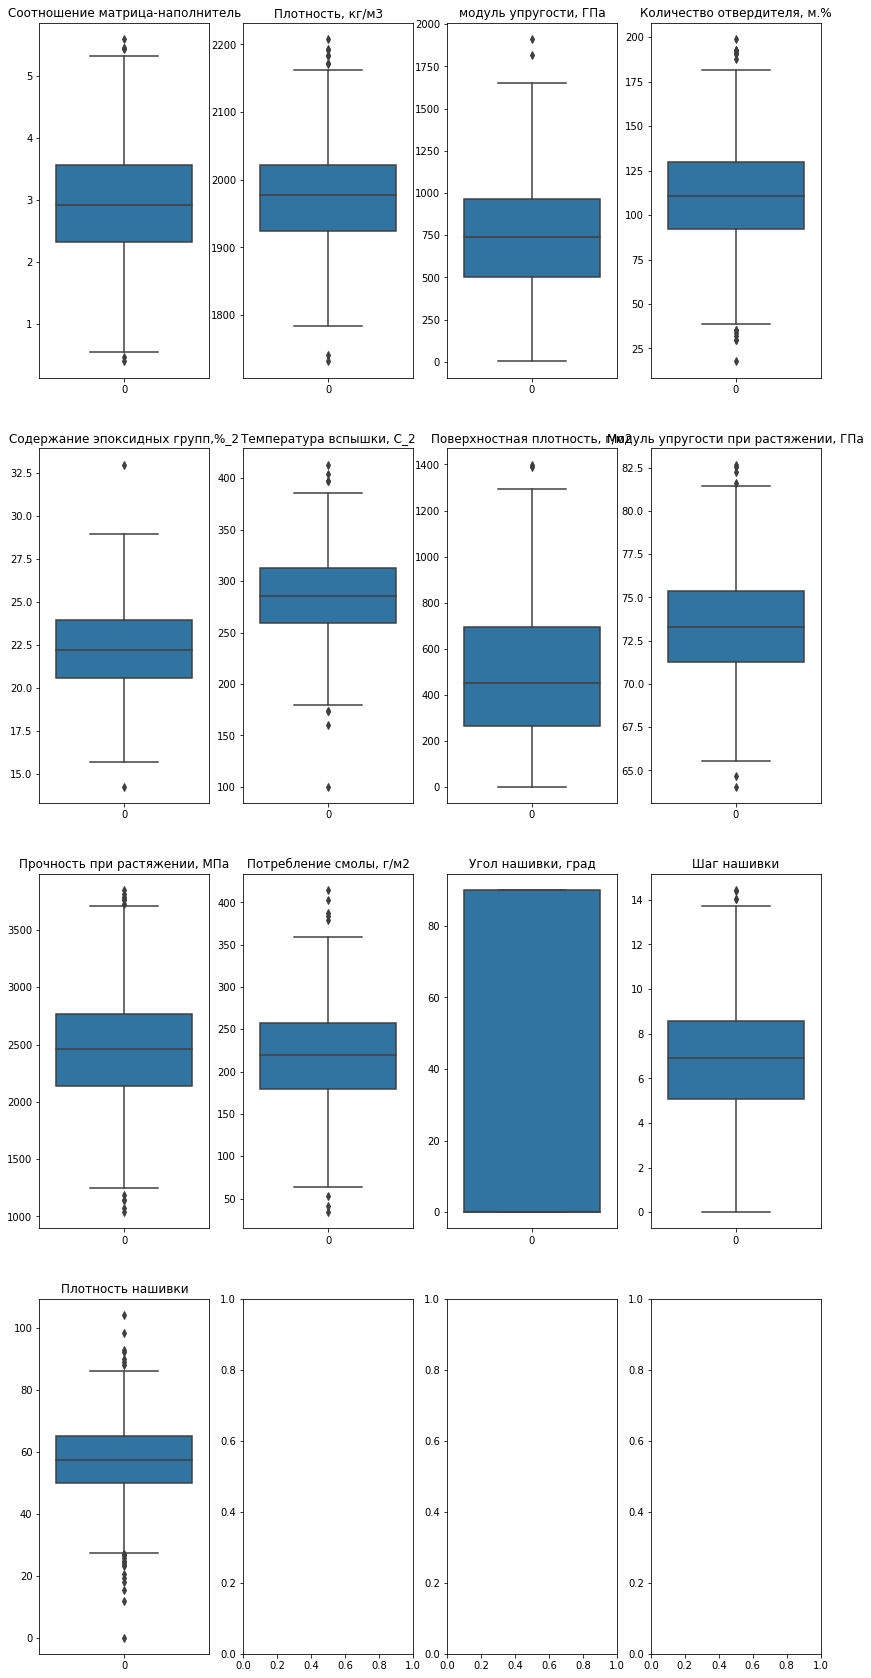

In [36]:
cols = 4
fig, axes = plt.subplots(len(df.columns) // cols + 1, cols, figsize=(14, 30))

ax = 0
for i in df.columns:
  axs = axes[ax // cols, ax % cols]
  axs.set_title(i)
  sns.boxplot(ax=axs, data = df[i])
  axs.set_xlabel(axs.get_xlabel(), fontdict={'size': 16})
  axs.set_ylabel('')
  ax = ax + 1
plt.show()

**Попарные графики рассеивания точек**

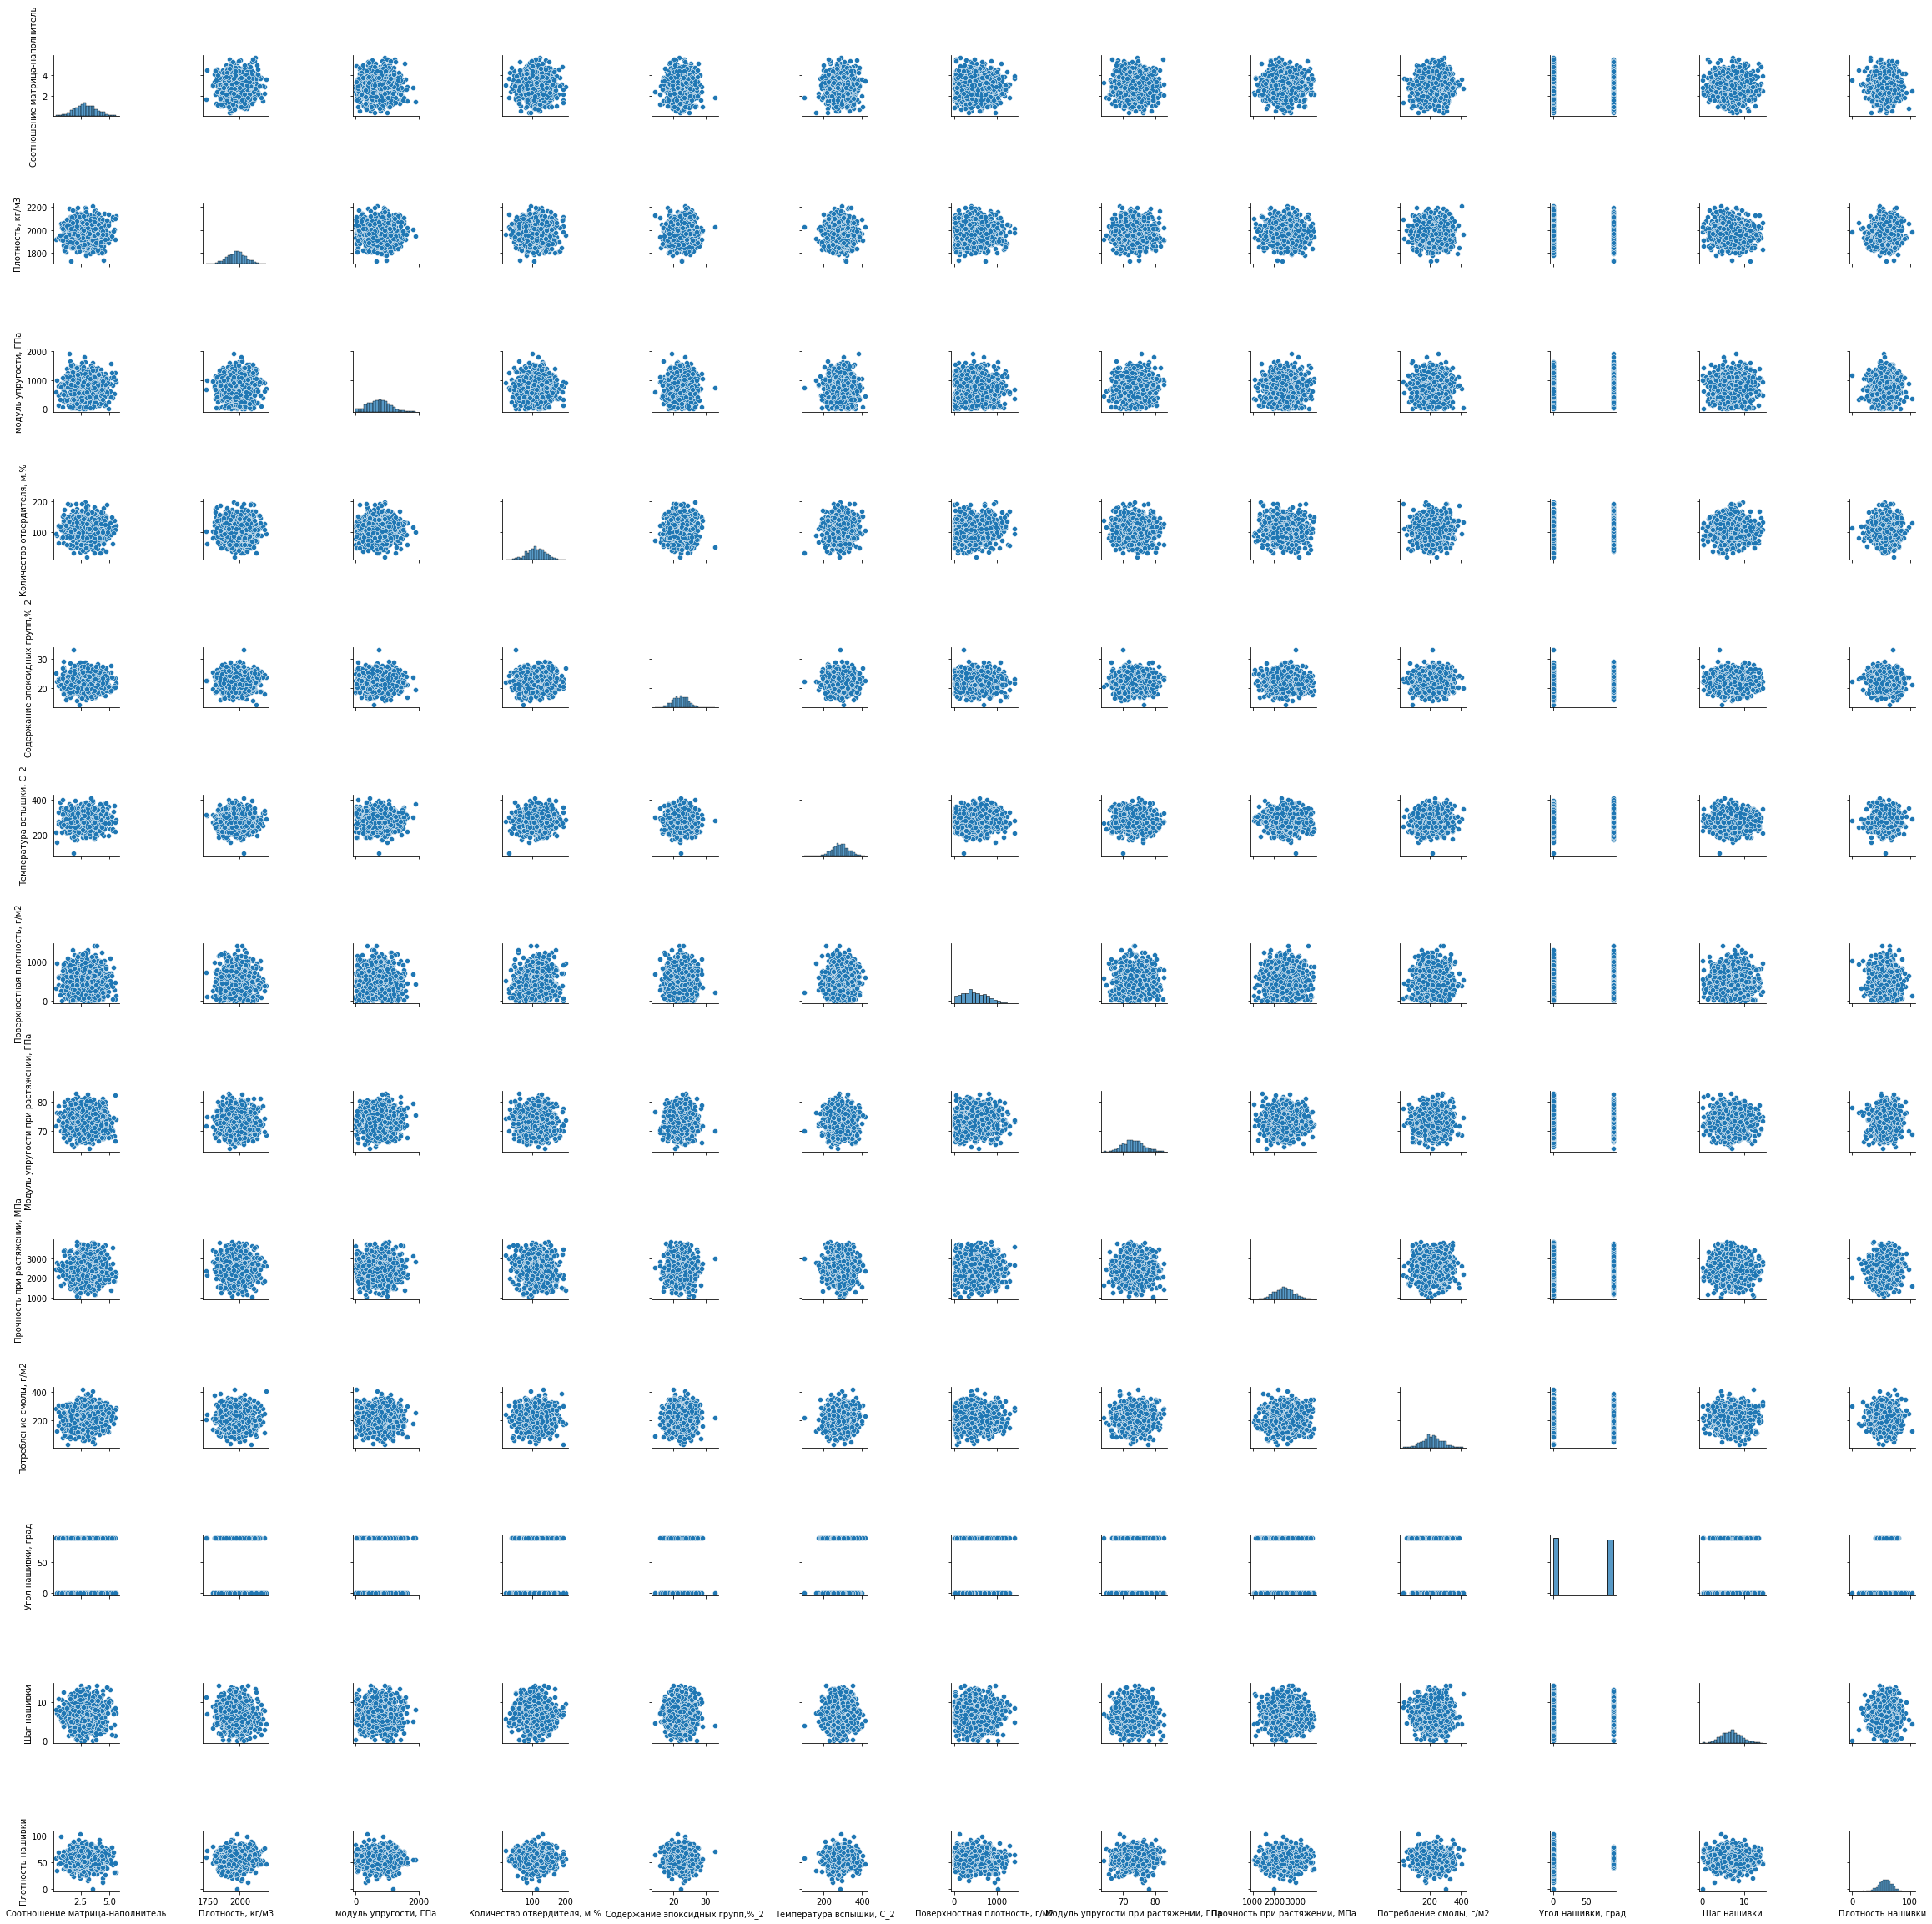

In [37]:
sns.pairplot(df);
plt.show()

**Тепловая карта**

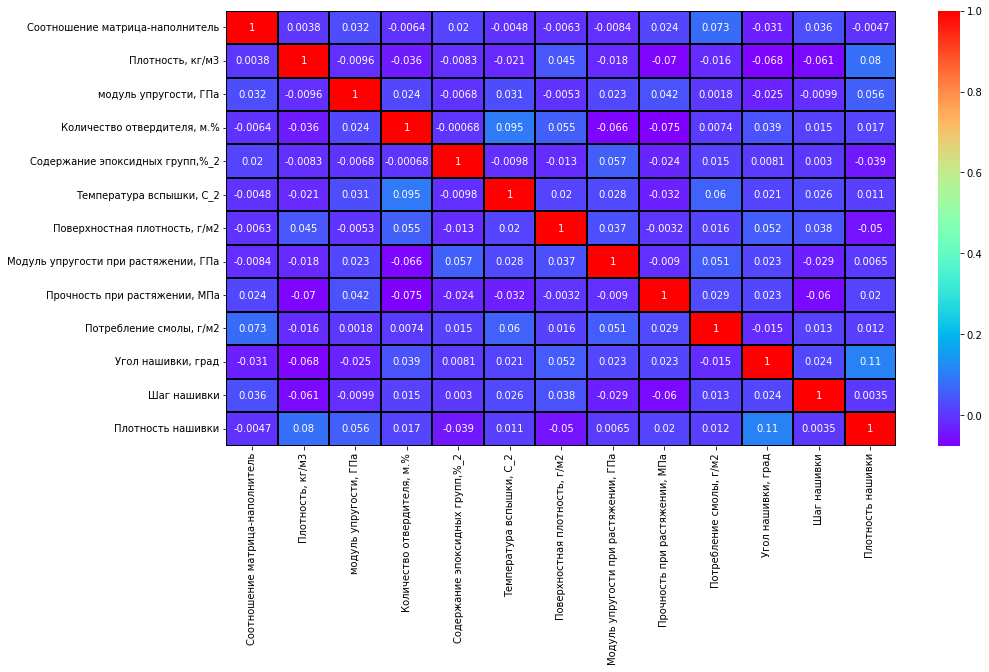

In [332]:
plt.figure(figsize = (15, 8))
sns.heatmap(df.corr(), cmap = 'rainbow', annot = True, linewidths = 1, linecolor = 'black')
plt.show()

In [334]:
df.describe().transpose()[['mean', 'std']].round(2)

,mean,std
Соотношение матрица-наполнитель,2.93,0.91
"Плотность, кг/м3",1975.73,73.73
"модуль упругости, ГПа",739.92,330.23
"Количество отвердителя, м.%",110.57,28.30
"Содержание эпоксидных групп,%_2",22.24,2.41
"Температура вспышки, С_2",285.88,40.94
"Поверхностная плотность, г/м2",482.73,281.31
"Модуль упругости при растяжении, ГПа",73.33,3.12
"Прочность при растяжении, МПа",2466.92,485.63
"Потребление смолы, г/м2",218.42,59.74


In [40]:
min_max_scaler = preprocessing.MinMaxScaler()
df_norm = pd.DataFrame(min_max_scaler.fit_transform(df), columns = df.columns, index = df.index)
df_norm

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.282131,0.626533,0.385679,0.067654,0.427467,0.000000,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.548135
1,0.282131,0.626533,0.385679,0.178021,0.506535,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.576985
2,0.282131,0.626533,0.385679,0.177469,1.000000,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.276998,0.673149
3,0.282131,0.626533,0.385679,0.613972,0.373167,0.638420,0.149682,0.319194,0.698235,0.488979,0.0,0.346248,0.451971
4,0.457857,0.626533,0.393150,0.519387,0.427467,0.589311,0.149682,0.319194,0.698235,0.488979,0.0,0.346248,0.548135
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,0.361750,0.462855,0.476884,0.382158,0.313057,0.717503,0.149109,0.485125,0.480312,0.239516,1.0,0.628535,0.452161
1019,0.587163,0.668737,0.231678,0.707685,0.285131,0.492271,0.250230,0.475992,0.470745,0.220404,1.0,0.731664,0.516890
1020,0.555750,0.505470,0.217065,0.512067,0.517605,0.473781,0.528643,0.573346,0.578340,0.532590,1.0,0.288158,0.650355
1021,0.637396,0.703842,0.387114,0.682389,0.266309,0.561107,0.458108,0.536217,0.368070,0.428909,1.0,0.437186,0.560262


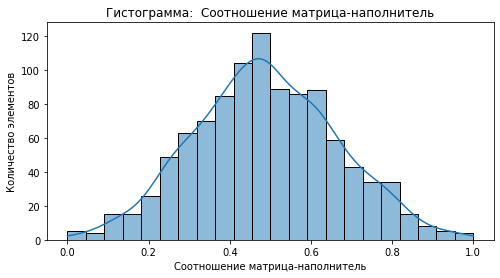

Минимальное значение: 0.0
Максимальное Значение: 0.9999999999999998
Среднее значение: 0.48842706548334663
Медианное значение: 0.48391214957213835


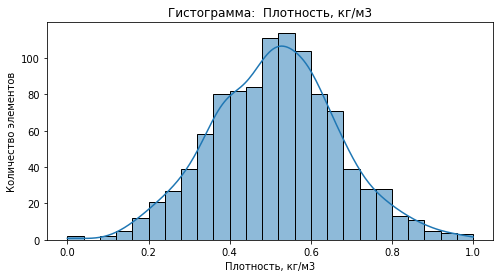

Минимальное значение: 0.0
Максимальное Значение: 0.9999999999999996
Среднее значение: 0.5125330239401388
Медианное значение: 0.5164967500309499


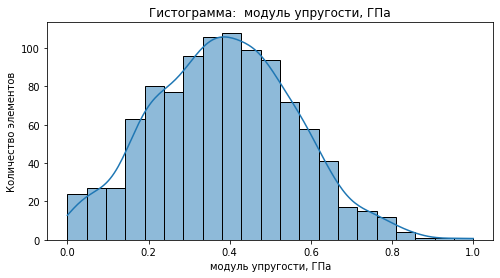

Минимальное значение: 0.0
Максимальное Значение: 0.9999999999999998
Среднее значение: 0.3863006080294372
Медианное значение: 0.3861649917092691


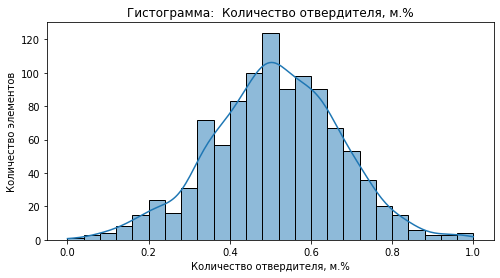

Минимальное значение: 0.0
Максимальное Значение: 1.0
Среднее значение: 0.512273008011523
Медианное значение: 0.5122402909575503


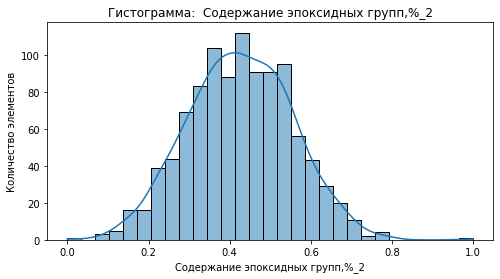

Минимальное значение: 0.0
Максимальное Значение: 0.9999999999999999
Среднее значение: 0.42621487697852667
Медианное значение: 0.4254869078568345


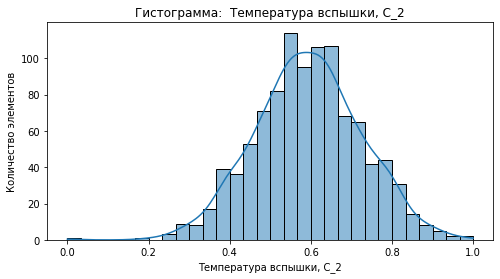

Минимальное значение: 0.0
Максимальное Значение: 0.9999999999999999
Среднее значение: 0.5933543688251932
Медианное значение: 0.5934011681345547


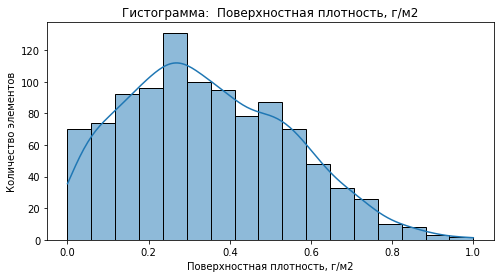

Минимальное значение: 0.0
Максимальное Значение: 1.0
Среднее значение: 0.3446384890575496
Медианное значение: 0.3225735697245788


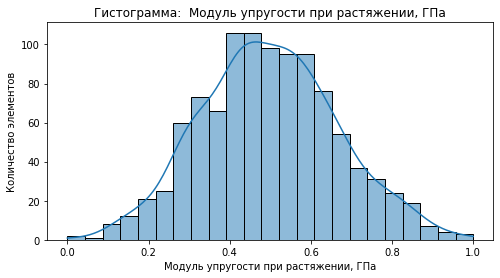

Минимальное значение: 0.0
Максимальное Значение: 1.0
Среднее значение: 0.497880364632318
Медианное значение: 0.4946719318267907


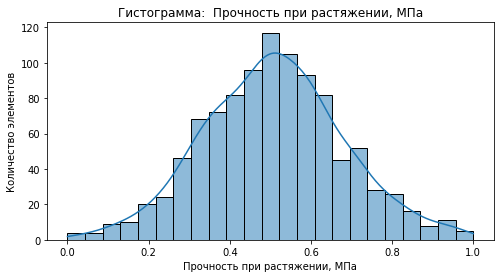

Минимальное значение: 0.0
Максимальное Значение: 1.0000000000000002
Среднее значение: 0.5086343525677166
Медианное значение: 0.5060029793320717


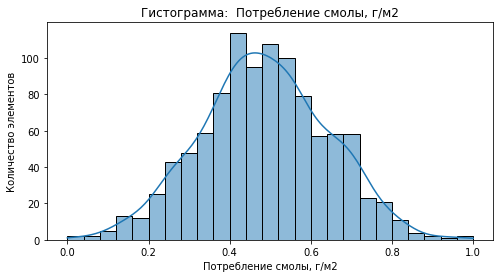

Минимальное значение: 0.0
Максимальное Значение: 1.0
Среднее значение: 0.4848375229975523
Медианное значение: 0.48687471778233204


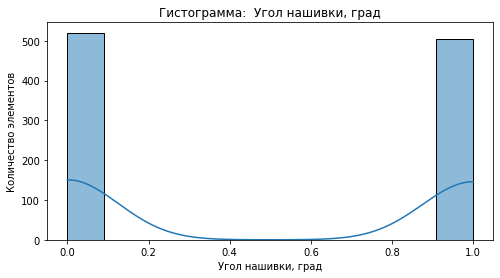

Минимальное значение: 0.0
Максимальное Значение: 1.0
Среднее значение: 0.4916911045943304
Медианное значение: 0.0


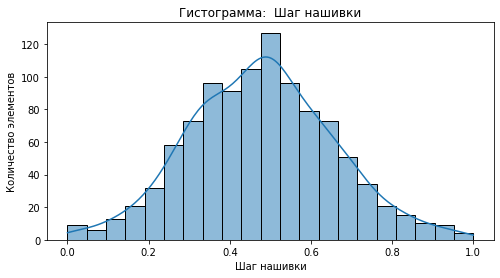

Минимальное значение: 0.0
Максимальное Значение: 0.9999999999999999
Среднее значение: 0.47776819544379445
Медианное значение: 0.47894002139441433


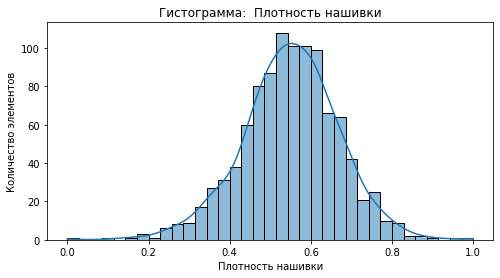

Минимальное значение: 0.0
Максимальное Значение: 1.0
Среднее значение: 0.5496156678023919
Медианное значение: 0.5514234608628285


In [42]:
for i in df_norm.columns:
    plt.figure(figsize = (8,4))
    plt.title('Гистограмма: ' + ' ' + i)
    plt.ylabel('Количество элементов')
    sns.histplot(data = df_norm[i], kde = True)
    plt.show()
    print(f'Минимальное значение: {df_norm[i].min()}')
    print(f'Максимальное Значение: {df_norm[i].max()}')
    print(f'Среднее значение: {df_norm[i].mean()}')
    print(f'Медианное значение: {df_norm[i].median()}')

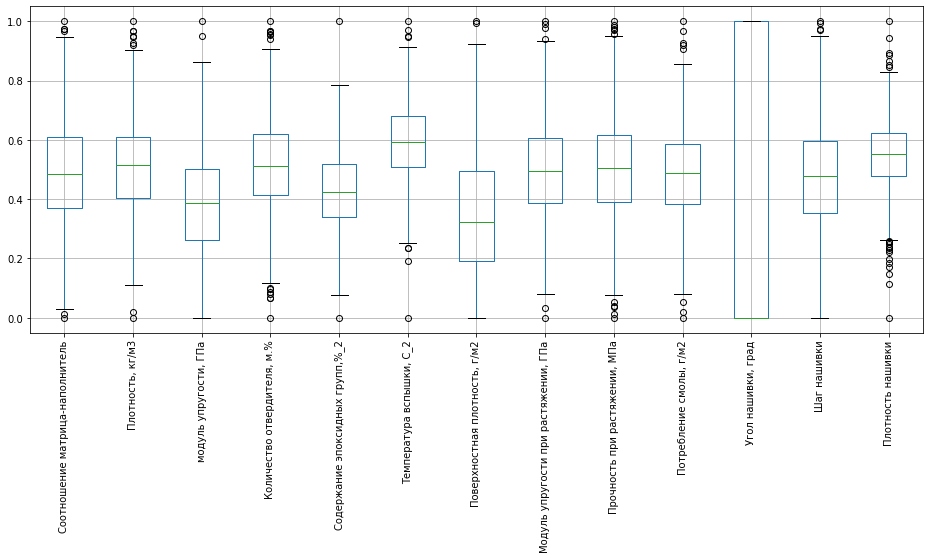

In [43]:
boxplot = df_norm.boxplot(rot = 90, figsize = (16,6))

In [45]:
X_N = df_norm.drop(columns=['Соотношение матрица-наполнитель'])
y_N = df_norm['Соотношение матрица-наполнитель']

In [48]:
X_N_train, X_N_test, y_N_train, y_N_test = train_test_split(X_N,y_N, test_size=0.3, random_state=42)

In [66]:
model_N_start = Sequential([
                      Dense(20,activation = "relu", input_shape=(12,)),
                      Dense(5, activation = "relu"),
                      Dense(1)                
                      ])

In [67]:
model_N_start.compile(optimizer = "adam", loss = "categorical_crossentropy")

Epoch 1/18
15/15 [==============================] - 1s 14ms/step - loss: 5.8018e-08 - val_loss: 5.8708e-08
Epoch 2/18
15/15 [==============================] - 0s 4ms/step - loss: 5.8018e-08 - val_loss: 5.8708e-08
Epoch 3/18
15/15 [==============================] - 0s 5ms/step - loss: 5.8018e-08 - val_loss: 5.8708e-08
Epoch 4/18
15/15 [==============================] - 0s 3ms/step - loss: 5.8018e-08 - val_loss: 5.8708e-08
Epoch 5/18
15/15 [==============================] - 0s 4ms/step - loss: 5.8018e-08 - val_loss: 5.8708e-08
Epoch 6/18
15/15 [==============================] - 0s 4ms/step - loss: 5.8018e-08 - val_loss: 5.8708e-08
Epoch 7/18
15/15 [==============================] - 0s 7ms/step - loss: 5.8018e-08 - val_loss: 5.8708e-08
Epoch 8/18
15/15 [==============================] - 0s 8ms/step - loss: 5.8018e-08 - val_loss: 5.8708e-08
Epoch 9/18
15/15 [==============================] - 0s 7ms/step - loss: 5.8018e-08 - val_loss: 5.8708e-08
Epoch 10/18
15/15 [==========================

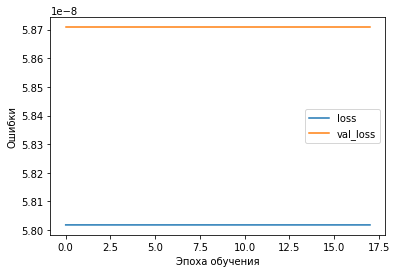

In [68]:
history_start = model_N_start.fit(X_N_train, y_N_train, batch_size = 50, epochs = 18, verbose = 1,
                       validation_data=(X_N_test, y_N_test))

plt.plot(history_start.history['loss'],
         label = 'loss')

plt.plot(history_start.history['val_loss'],
         label = 'val_loss')

plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибки')
plt.legend()
plt.show()

In [71]:
model_N = Sequential([
                      Dense(14,activation = "relu", input_shape=(12,)),
                      Dense(7, activation = "relu"),
                      Dense(1)                
                      ])

In [73]:
model_N.compile(optimizer = "adam", loss = "mae")

In [79]:
model_N.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 14)                182       
                                                                 
 dense_16 (Dense)            (None, 7)                 105       
                                                                 
 dense_17 (Dense)            (None, 1)                 8         
                                                                 
Total params: 295
Trainable params: 295
Non-trainable params: 0
_________________________________________________________________


In [74]:
history = model_N.fit(X_N_train, y_N_train, batch_size = 50, epochs = 50, verbose = 1,
                       validation_data=(X_N_test, y_N_test))

Epoch 1/50
15/15 [==============================] - 2s 85ms/step - loss: 0.3732 - val_loss: 0.2492
Epoch 2/50
15/15 [==============================] - 0s 12ms/step - loss: 0.2034 - val_loss: 0.1734
Epoch 3/50
15/15 [==============================] - 0s 10ms/step - loss: 0.1613 - val_loss: 0.1746
Epoch 4/50
15/15 [==============================] - 0s 14ms/step - loss: 0.1563 - val_loss: 0.1694
Epoch 5/50
15/15 [==============================] - 0s 9ms/step - loss: 0.1530 - val_loss: 0.1676
Epoch 6/50
15/15 [==============================] - 0s 11ms/step - loss: 0.1513 - val_loss: 0.1664
Epoch 7/50
15/15 [==============================] - 0s 12ms/step - loss: 0.1502 - val_loss: 0.1651
Epoch 8/50
15/15 [==============================] - 0s 7ms/step - loss: 0.1495 - val_loss: 0.1637
Epoch 9/50
15/15 [==============================] - 0s 7ms/step - loss: 0.1484 - val_loss: 0.1635
Epoch 10/50
15/15 [==============================] - 0s 10ms/step - loss: 0.1481 - val_loss: 0.1626
Epoch 11/50


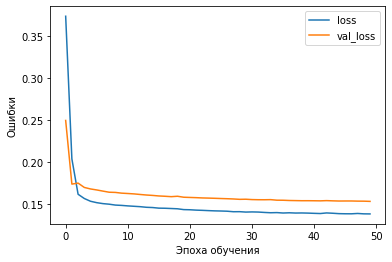

In [75]:
plt.plot(history.history['loss'],
         label = 'loss')

plt.plot(history.history['val_loss'],
         label = 'val_loss')

plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибки')
plt.legend()
plt.show()